In [1]:
# reaf files
import pandas as pd
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
print('training set shape = {}'.format(df_train.shape))
print('training set memory usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024 **2))
print('test set shape = {}'.format(df_test.shape))
print('test set memory usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024 **2))



training set shape = (7613, 5)
training set memory usage = 0.29 MB
test set shape = (3263, 4)
test set memory usage = 0.10 MB


In [2]:
# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

#keyword及location的缺失情形

missing_cols = ['keyword', 'location']
fig , axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
#ncols : 橫的幾格, figsize : 格子尺寸

sns.barplot(x=df_train[missing_cols].isnull().sum().index, 
            y=df_train[missing_cols].isnull().sum().values,
            ax=axes[0])
sns.barplot(x=df_test[missing_cols].isnull().sum().index,
            y=df_test[missing_cols].isnull().sum().values,
            ax=axes[1])
axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [df_train, df_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')


<Figure size 1700x400 with 2 Axes>

In [3]:
#單詞量
print(f'Number of unique values in keyword = {df_train["keyword"].nunique()} (Training) / {df_test["keyword"].nunique()} (Test)')

print(f'Number of unique values in location = {df_train["location"].nunique()} (Training) / {df_test["location"].nunique()} (Test)')

Number of unique values in keyword = 222 (Training) / 222 (Test)
Number of unique values in location = 3342 (Training) / 1603 (Test)


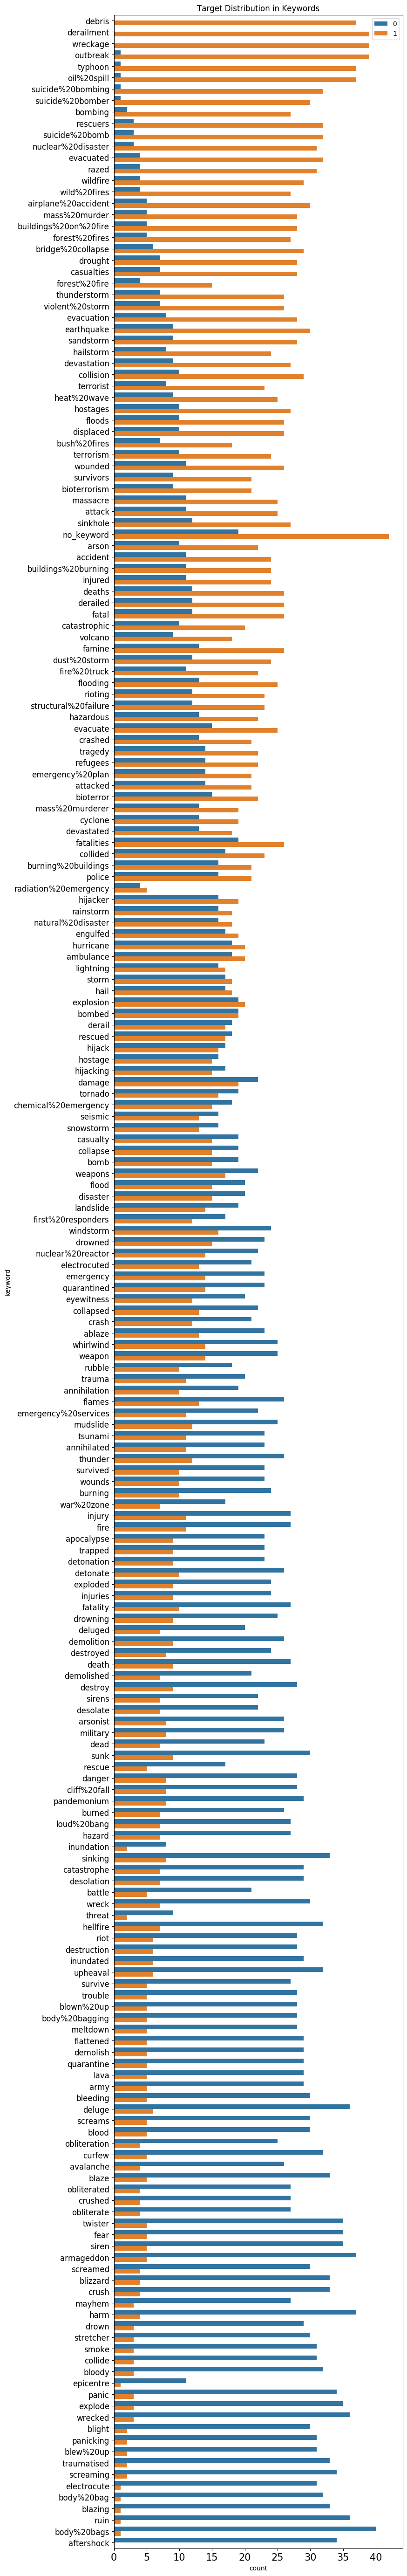

In [4]:
#單詞與災害是否真實之頻率

df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize= (8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
            hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

Text(0, 0.5, 'samples')

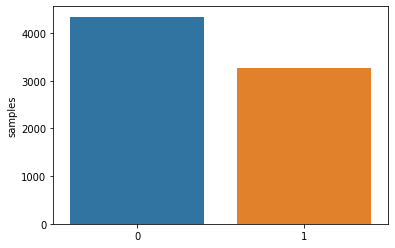

In [5]:
#Class distribution

x = df_train.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

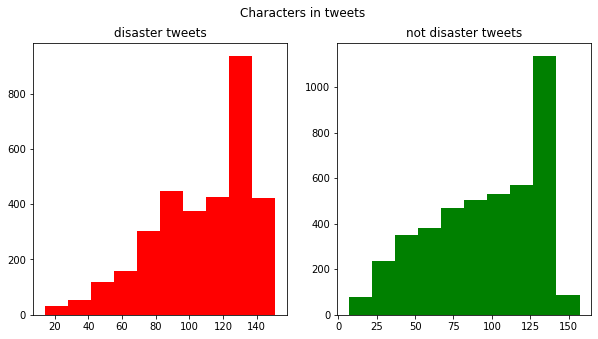

In [6]:
#number of characters in tweets


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = df_train[df_train['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color='red')
tweet_len = df_train[df_train['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color='green')

ax1.set_title('disaster tweets')
ax2.set_title('not disaster tweets')

fig.suptitle('Characters in tweets')
plt.show()

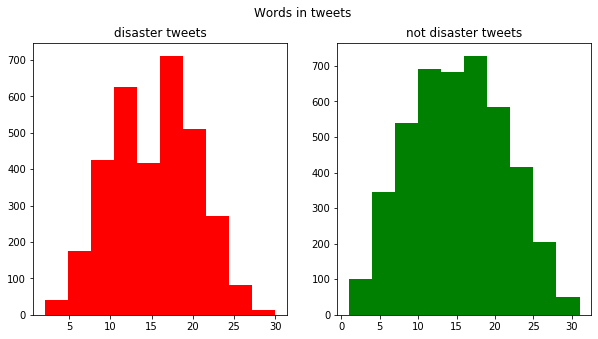

In [7]:
# number of words in a tweet

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = df_train[df_train['target'] == 1]['text'].str.split().map(lambda x : len(x))
ax1.hist(tweet_len, color='red')
tweet_len = df_train[df_train['target'] == 0]['text'].str.split().map(lambda x : len(x))
ax2.hist(tweet_len, color='green')

ax1.set_title('disaster tweets')
ax2.set_title('not disaster tweets')

fig.suptitle('Words in tweets')
plt.show()

In [8]:
print(df_train[df_train['target'] == 1]['text'].str.split())

0       [Our, Deeds, are, the, Reason, of, this, #eart...
1          [Forest, fire, near, La, Ronge, Sask., Canada]
2       [All, residents, asked, to, 'shelter, in, plac...
3       [13,000, people, receive, #wildfires, evacuati...
4       [Just, got, sent, this, photo, from, Ruby, #Al...
                              ...                        
7608    [Two, giant, cranes, holding, a, bridge, colla...
7609    [@aria_ahrary, @TheTawniest, The, out, of, con...
7610    [M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...
7611    [Police, investigating, after, an, e-bike, col...
7612    [The, Latest:, More, Homes, Razed, by, Norther...
Name: text, Length: 3271, dtype: object


Text(0.5, 0.98, 'Average word length in each tweet')

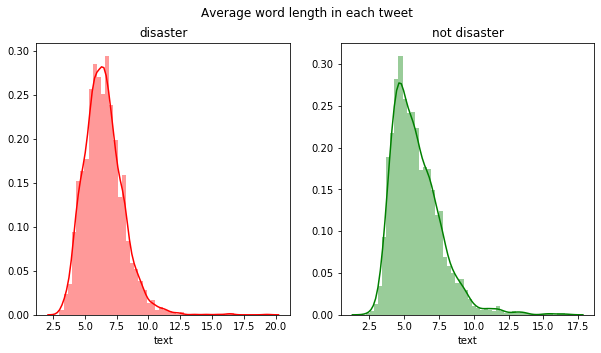

In [9]:
#Average word length in a tweet 
import numpy as np

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

word = df_train[df_train['target'] == 1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax=ax1, color='red')
ax1.set_title('disaster')

word = df_train[df_train['target'] == 0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax=ax2, color='green')
ax2.set_title('not disaster')


fig.suptitle('Average word length in each tweet')



In [10]:
def create_corpus(target):
    corpus = []
    for x in df_train[df_train['target'] == target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [11]:
from collections import defaultdict
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
corpus = create_corpus(0)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[0:10]


<BarContainer object of 10 artists>

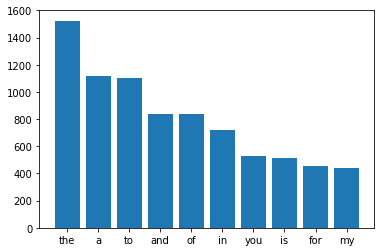

In [12]:
x,y = zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

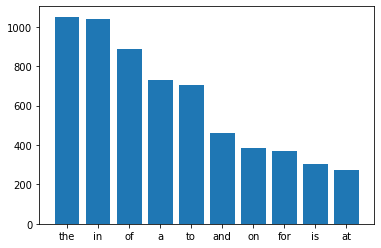

In [13]:
corpus = create_corpus(1)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[0:10]

x,y = zip(*top)
plt.bar(x,y)

<BarContainer object of 18 artists>

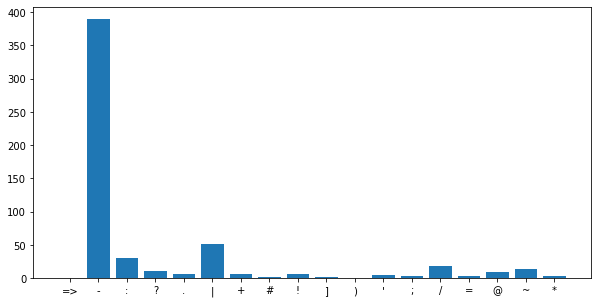

In [14]:
#punctuation

plt.figure(figsize= (10,5))
corpus = create_corpus(1)

dic=defaultdict(int)

import string
special = string.punctuation

for punctuation in (corpus):
    if punctuation in special:
        dic[punctuation] +=1
        
x, y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 20 artists>

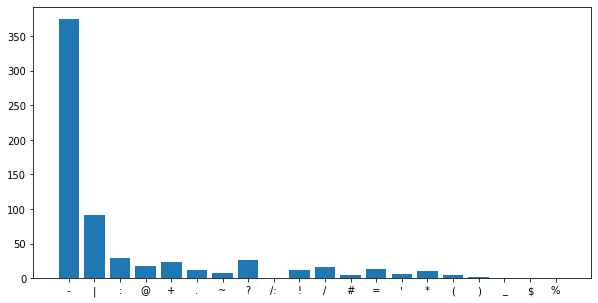

In [15]:
plt.figure(figsize= (10,5))
corpus = create_corpus(0)

dic=defaultdict(int)

import string
special = string.punctuation

for punctuation in (corpus):
    if punctuation in special:
        dic[punctuation] +=1
        
x, y=zip(*dic.items())
plt.bar(x,y)

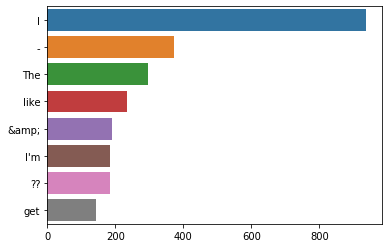

In [16]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()

x = []
y = []

for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
        
sns.barplot(x=y, y=x)

In [17]:
#Ngram analysis
from sklearn.feature_extraction.text import CountVectorizer

def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x : x[1], reverse = True)
    return words_freq[:n]

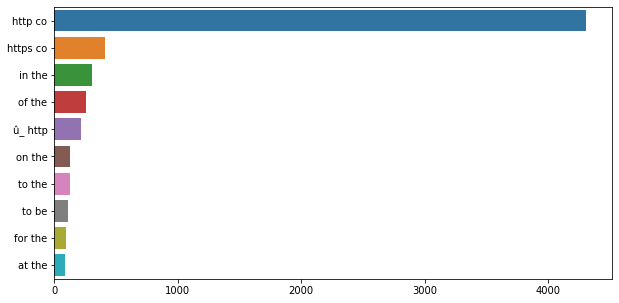

In [18]:
plt.figure(figsize=(10,5))
top_tweet_bigrams = get_top_tweet_bigrams(df_train['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

In [ ]:
#data clean!!

df_all = pd.concat([df_train, df_test])
print(df_all.shape)

(10876, 5)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#removing urls&html tags
import re
example = "New competition launched :https://www.kaggle.com/c/nlp-getting-started"
example2 = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


def remove_HTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
remove_URL(example)

'New competition launched :'

In [ ]:
print(remove_HTML(example2))
remove_HTML(example2)


Real or Fake
Kaggle 
getting started



'\nReal or Fake\nKaggle \ngetting started\n'

In [ ]:
#print(df['text'])
df_all['text'] = df_all['text'].apply(lambda x : remove_URL(x))
df_all['text'] = df_all['text'].apply(lambda x : remove_HTML(x))

In [ ]:
#remove_emoji : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b


def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


remove_emoji("Omg another Earthquake 😔😔")
df_all['text'] = df_all['text'].apply(lambda x : remove_emoji(x))

In [ ]:
#Remove punctuations
#from string import maketrans 

def remove_punctuation(text):
    punct_list = str.maketrans('','',string.punctuation)
                #str.maketrans(x,y,z)
                #三个参数 x、y、z，第三个参数 z 必须是字符串，其字符将被映射为 None，即删除该字符；如果 z 中字符与 x 中字符重复，该重复的字符在最终结果中还是会被删除。也就是无论是否重复，只要有第三个参数 z，z 中的字符都会被删除。
    return text.translate(punct_list)


example3="I am a #king"
print(remove_punctuation(example3))

I am a king


In [ ]:
df_all['text'] = df_all['text'].apply(lambda x : remove_punctuation(x))

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
            
    return " ".join(corrected_text)

In [ ]:
#df_all['text'] = df_all['text'].apply(lambda x : correct_spellings(x))

In [ ]:
#GloVe for Vectorization
from tqdm import tqdm
from nltk.tokenize import word_tokenize
def create_corpus(df_all):
    corpus = []
    for tweet in tqdm(df_all['text']):
        words = [ word.lower() for word in word_tokenize(tweet) if ((word.isalpha() ==1) & (word not in stop)) ]
        corpus.append(words)
    return corpus

In [ ]:
corpus = create_corpus(df_all)

100%|██████████| 10876/10876 [00:01<00:00, 8378.70it/s]


In [ ]:
embedding_dict = {}
with open('./glove/glove.6B.100d.txt','r') as f :
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
f.close()
Glove_Dimension = 100 #8/16change Glove_Dimension to 200d 

In [ ]:
MAX_LEN = 50
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

sequences = tokenizer_obj.texts_to_sequences(corpus)
tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')

Using TensorFlow backend.


In [ ]:
word_index = tokenizer_obj.word_index
print('Number of unique words : '  ,len(word_index))


Number of unique words :  20342


In [ ]:
num_words = len(word_index) +1
embedding_matrix = np.zeros((num_words,Glove_Dimension))

for word,i in tqdm(word_index.items()):
    
    if i > num_words:
        continue
        
    emb_vec = embedding_dict.get(word)

    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

100%|██████████| 20342/20342 [00:00<00:00, 466173.82it/s]


In [ ]:
#Baselibe Model
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D,LSTM,Dense
from keras.initializers import Constant
from keras.optimizers import Adam
model = Sequential()

embedding = Embedding(num_words, Glove_Dimension, 
                      embeddings_initializer=Constant(embedding_matrix),
                      input_length=MAX_LEN, trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate = 1e-5)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2034300   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,400,125
Trainable params: 365,825
Non-trainable params: 2,034,300
_________________________________________________________________


In [ ]:
train = tweet_pad[:df_train.shape[0]]
test = tweet_pad[df_train.shape[0]:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, df_train['target'].values, test_size=0.15)
print('Shape of train', X_train.shape)
print('Shape of Validation', X_test.shape)

Shape of train (6471, 50)
Shape of Validation (1142, 50)


In [ ]:
history = model.fit(X_train, y_train, batch_size=4, epochs=30, validation_data=(X_test, y_test), verbose=1)

Train on 6471 samples, validate on 1142 samples
Epoch 1/30
1784/6471 [=======>......................] - ETA: 1:01 - loss: 0.6922 - accuracy: 0.5656

In [ ]:
y_pre = model.predict(test)
y_pre=np.round(y_pre).astype(int).reshape(3263)


submission = pd.DataFrame({'id': df_test['id'].values.tolist(), 'target':y_pre})

submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

#816 16:00 change epoch to 30 and set lstm unit 64 -> 128 
#glove use 200d 

#816 18:00 change epoch to 30 and set lstm unit 128 -> 256 
#glove use 100d 